Heart Disease Prediction

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load dataset
df = pd.read_csv('../data/heart.csv')

# Show first few rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Basic info
df.info()

# Missing values
df.isnull().sum()

# Stats
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


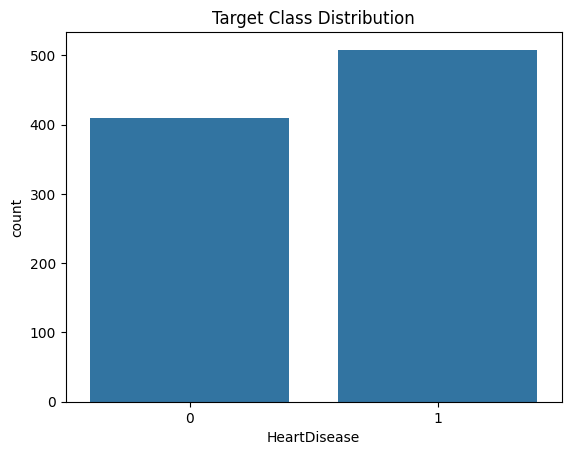

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [5]:
# Target column = 'HeartDisease' (0: No, 1: Yes)
sns.countplot(data=df, x='HeartDisease')
plt.title("Target Class Distribution")
plt.show()

# Print class counts
df['HeartDisease'].value_counts()


In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [11]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


4. Train & Evaluate Models

a. Logistic Regression

🔹 Logistic Regression
Accuracy: 0.8858695652173914
Time taken: 0.015 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



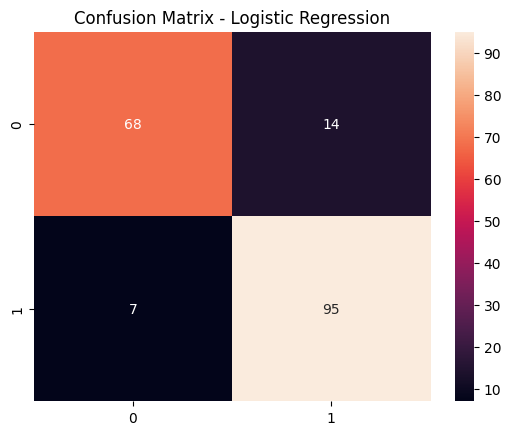

In [14]:
from sklearn.linear_model import LogisticRegression

start = time.time()
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
end = time.time()

y_pred_lr = lr.predict(X_test_scaled)

print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Time taken:", round(end - start, 4), "seconds")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


b. K-Nearest Neighbors

🔹 K-Nearest Neighbors
Accuracy: 0.8858695652173914
Time taken: 0.0069 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



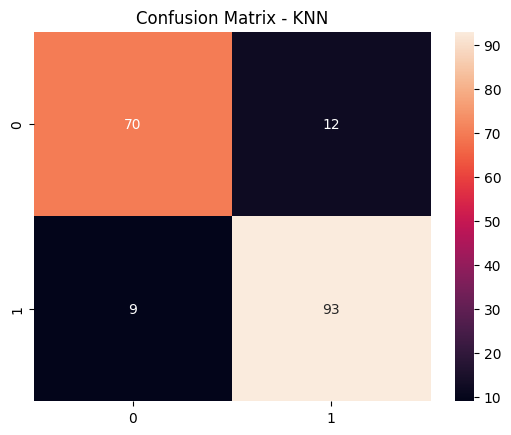

In [15]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
end = time.time()

y_pred_knn = knn.predict(X_test_scaled)

print("🔹 K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Time taken:", round(end - start, 4), "seconds")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.title("Confusion Matrix - KNN")
plt.show()


c. Random Forest

🔹 Random Forest
Accuracy: 0.8858695652173914
Time taken: 0.2545 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        82
           1       0.88      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



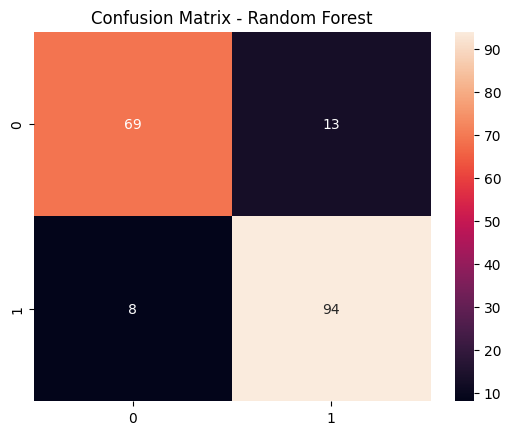

In [ ]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)  
end = time.time()

y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Time taken:", round(end - start, 4), "seconds")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()


## 📊 Model Comparison & Conclusion

We trained and evaluated three classification models on the Heart Disease Prediction dataset: **Logistic Regression**, **K-Nearest Neighbors (KNN)**, and **Random Forest**. Here's a comparison based on the metrics:

| Model               | Accuracy | Time Taken (s) | Precision (1) | Recall (1) | F1-Score (1) |
|--------------------|----------|----------------|----------------|-------------|---------------|
| Logistic Regression| 0.886    | 0.015          | 0.87           | 0.93        | 0.90          |
| KNN                | 0.886    | 0.007          | 0.89           | 0.91        | 0.90          |
| Random Forest      | 0.886    | 0.255          | 0.88           | 0.92        | 0.90          |


### Q1. Which model performed best and why?
All three models achieved **identical accuracy (88.6%)** and similar f1-scores.  
However:
- **KNN** slightly edged out in terms of **speed**
- **Random Forest** showed strong **recall for class 1**, making it suitable for scenarios where catching heart disease cases is more important than false positives.


### Q2. Which one was fastest?
- **K-Nearest Neighbors** was the fastest (~0.007s), followed by **Logistic Regression** (~0.015s).
- **Random Forest** was the slowest (~0.255s), due to its ensemble nature.


### Q3 Which was most interpretable?
- **Logistic Regression** is the most interpretable.  
  It offers direct insights into how each feature affects the target via coefficients.


### Q4. When would you use each one?

| Model               | When to Use                                                                          |
|--------------------|----------------------------------------------------------------------------------------|
| Logistic Regression| When interpretability is key and you need fast, baseline results.                     |
| KNN                | When dataset is small and you want a simple similarity-based model.                   |
| Random Forest      | When you prioritize accuracy/recall and don’t mind longer training or lower interpretability. |

---

###  Summary
All models performed equally well in this case. Choice of model depends on your **priority**:
- **Speed ➝ KNN**
- **Interpretability ➝ Logistic Regression**
- **Slightly better recall ➝ Random Forest**